<a href="https://www.kaggle.com/code/mazensafty/california-house-price-prediction?scriptVersionId=199379205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# California House Price Prediction

# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Exploration (EDA)

In [2]:
house_data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
print(house_data.shape)
house_data.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
house_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5850,-118.32,34.18,49.0,192.0,41.0,83.0,38.0,3.0179,118800.0,<1H OCEAN
9855,-121.88,36.58,29.0,4910.0,871.0,3438.0,904.0,4.0432,450000.0,NEAR OCEAN
845,-122.07,37.58,16.0,1606.0,240.0,1117.0,268.0,6.0661,247000.0,NEAR BAY
18917,-122.15,38.04,14.0,2804.0,587.0,1083.0,573.0,2.6466,168500.0,NEAR BAY
19957,-119.32,36.22,5.0,2319.0,438.0,1283.0,423.0,3.6343,95400.0,INLAND


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


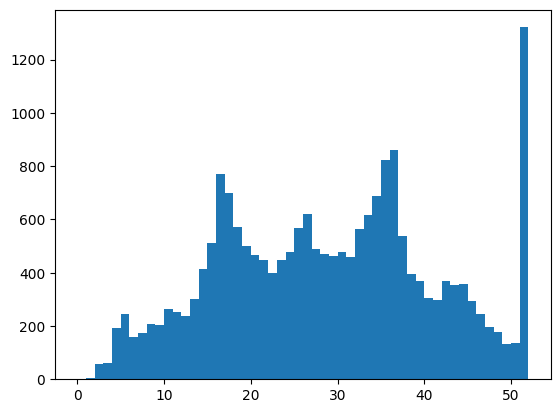

In [6]:
bins = np.arange(0 , house_data["housing_median_age"].max() + 1 , 1)
plt.hist(data = house_data , x = "housing_median_age" , bins = bins);

In [7]:
house_data["housing_median_age"].skew()

0.060330637599136865

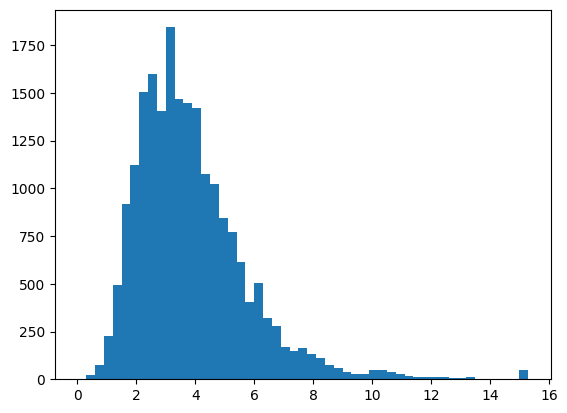

In [8]:
bins = np.arange(0 , house_data["median_income"].max() + 0.3 , 0.3)
plt.hist(data = house_data , x = "median_income" , bins = bins);

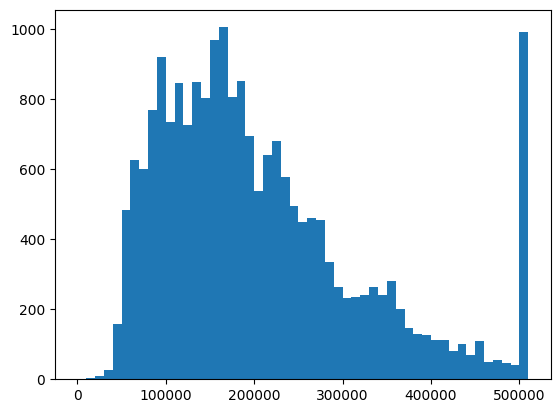

In [9]:
bins = np.arange(0 , house_data["median_house_value"].max() + 10000 , 10000)
plt.hist(data = house_data , x = "median_house_value" , bins = bins);

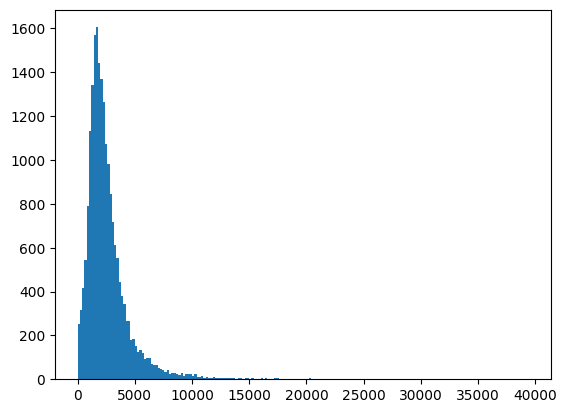

In [10]:
bins = np.arange(0 , house_data["total_rooms"].max() + 200 , 200)
plt.hist(data = house_data , x = "total_rooms" , bins = bins);

In [11]:
house_data["total_rooms"].skew()

4.147343450632158

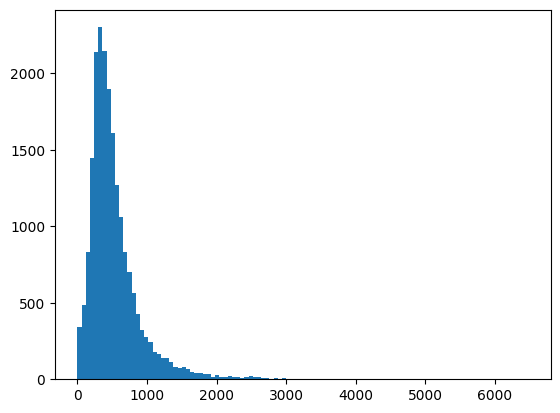

In [12]:
bins = np.arange(0 , house_data["total_bedrooms"].max() + 60 , 60)
plt.hist(data = house_data , x = "total_bedrooms" , bins = bins);

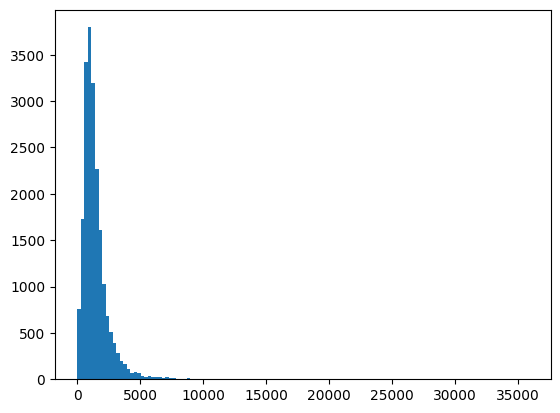

In [13]:
bins = np.arange(0 , house_data["population"].max() + 280 , 280)
plt.hist(data = house_data , x = "population" , bins = bins);

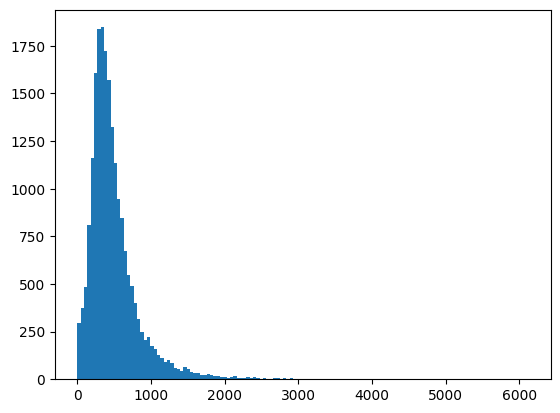

In [14]:
bins = np.arange(0 , house_data["households"].max() + 45 , 45)
plt.hist(data = house_data , x = "households" , bins = bins);

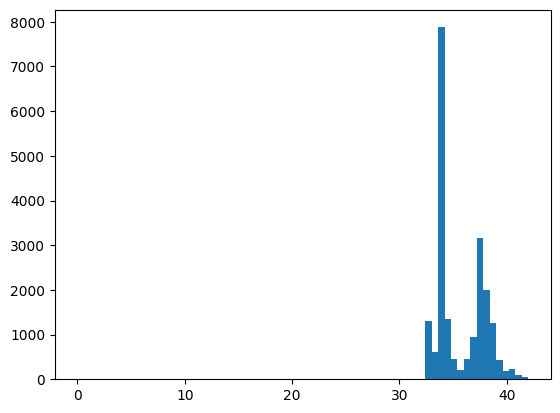

In [15]:
bins = np.arange(0 , house_data["latitude"].max() + 0.6 , 0.6)
plt.hist(data = house_data , x = "latitude" , bins = bins);

# Data Cleaning and Preprocessing

### Hundle Duplicates

In [16]:
dupli = house_data[house_data.duplicated()]
dupli

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Hundle Missing Vlaues

In [17]:
print(house_data.isnull().sum() , "\n")
percentage = house_data.isnull().sum().sum() / house_data.shape[0] * 200
print(percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

2.005813953488372


##### Number of null rows is very small compare to all rows so we will drop it

In [18]:
house_data = house_data.dropna(axis = 0)
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
house_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

### Feature Engineering

In [20]:
house_data["bedrooms_ratio"] = house_data["total_bedrooms"] / house_data["total_rooms"]
house_data["households_rooms"] = house_data["total_rooms"] / house_data["households"]

# Data Analysis

In [21]:
house_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_ratio,households_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.231774,4.761658
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0.192899,4.931907
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0.221327,4.797527
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.260274,4.294118
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0.199211,4.970588


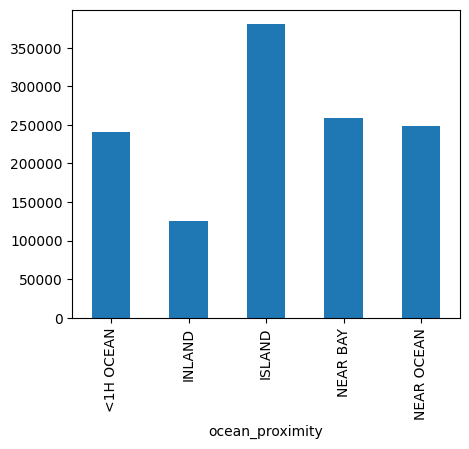

In [22]:
ocean = house_data.groupby(["ocean_proximity"])["median_house_value"].mean()
ocean.plot(kind = "bar" , figsize = [5,4]);

In [23]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  bedrooms_ratio      20433 non-null  float64
 11  households_rooms    20433 non-null  float64
dtypes: float64(11), object(1)
memory usage: 2.0+ MB


In [24]:
numeric = house_data.select_dtypes(include = ["float64"])

In [25]:
house_data = house_data.join(pd.get_dummies(house_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

In [26]:
house_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.092657,-0.027307,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.113815,0.106423,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.136089,-0.153031,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.187900,0.133482,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.084238,0.001538,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.035319,-0.071898,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.065087,-0.080165,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.615661,0.325307,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.255880,0.151344,0.257614,-0.484787,0.023525,0.160526,0.140378
bedrooms_ratio,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.255880,1.000000,-0.416952,0.078247,-0.114226,0.016246,0.002007,0.040163


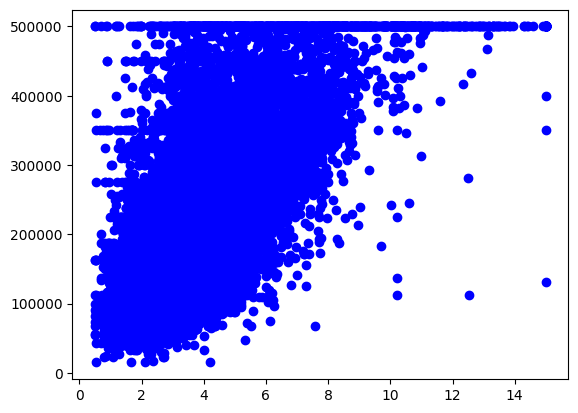

In [27]:
plt.scatter(house_data["median_income"], house_data["median_house_value"], c ="blue");

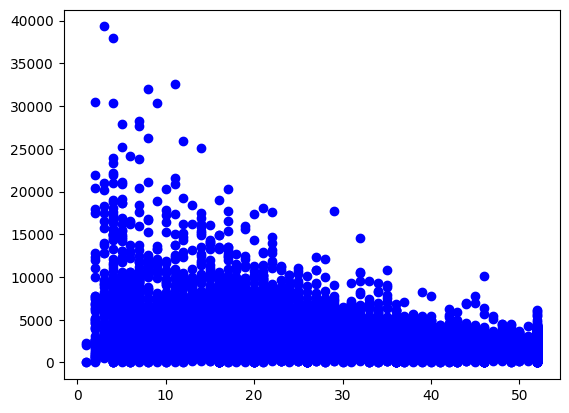

In [28]:
plt.scatter(house_data["housing_median_age"], house_data["total_rooms"], c ="blue");

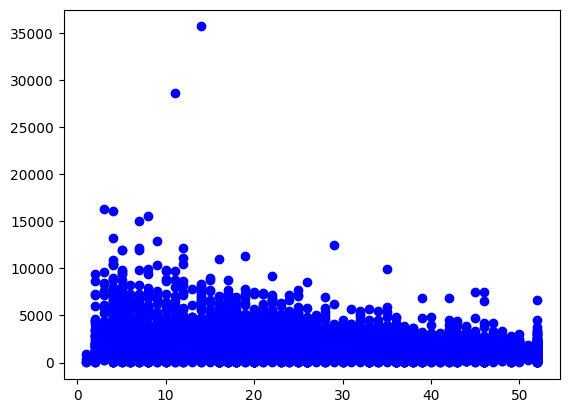

In [29]:
plt.scatter(house_data["housing_median_age"], house_data["population"], c ="blue");

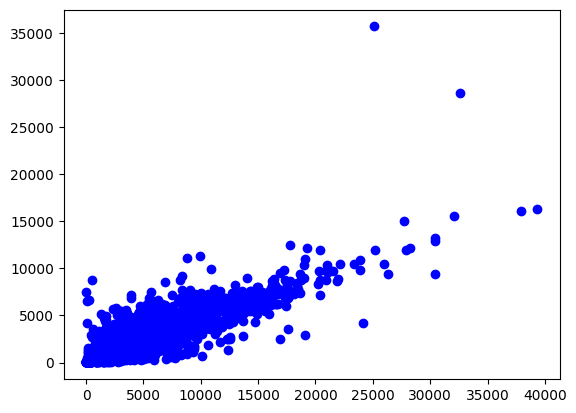

In [30]:
plt.scatter(house_data["total_rooms"], house_data["population"], c ="blue");

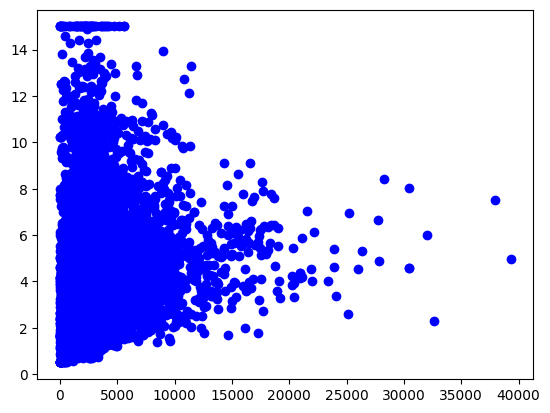

In [31]:
plt.scatter(house_data["total_rooms"], house_data["median_income"], c ="blue");

<Axes: xlabel='longitude', ylabel='latitude'>

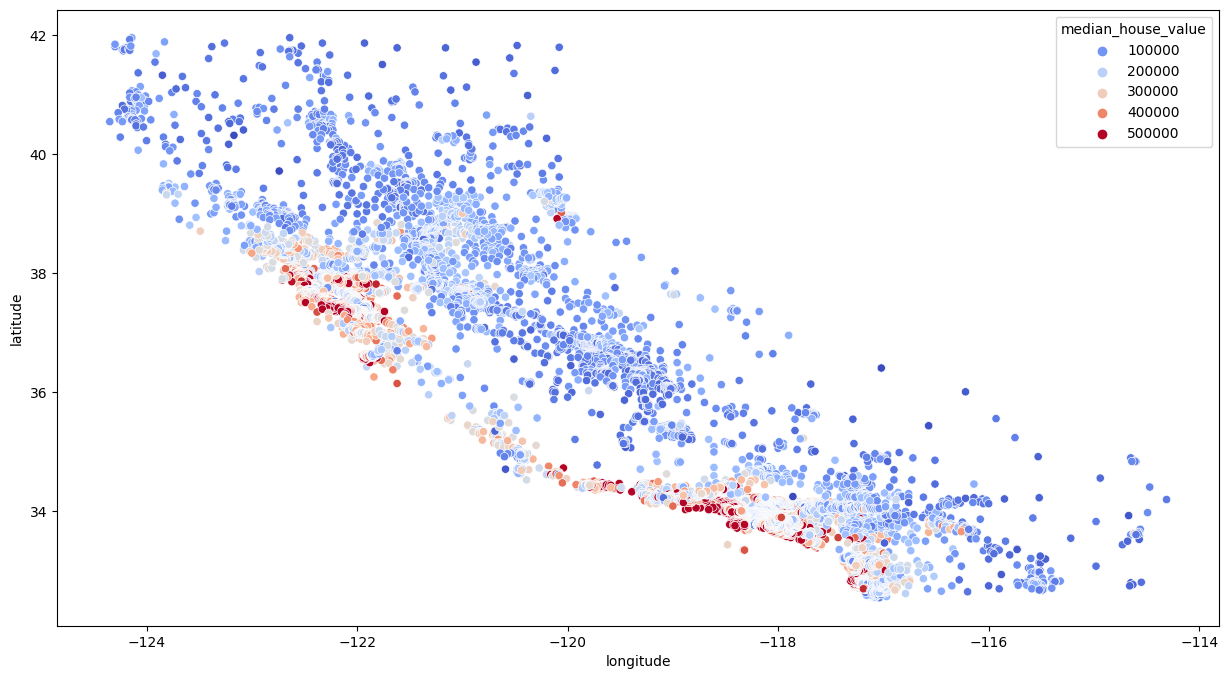

In [32]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = house_data["longitude"] , y = house_data["latitude"] , data = house_data ,hue = "median_house_value" , palette = "coolwarm")

# Build Model

## Prepare Data

In [33]:
numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_ratio,households_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853


### Skweed Data

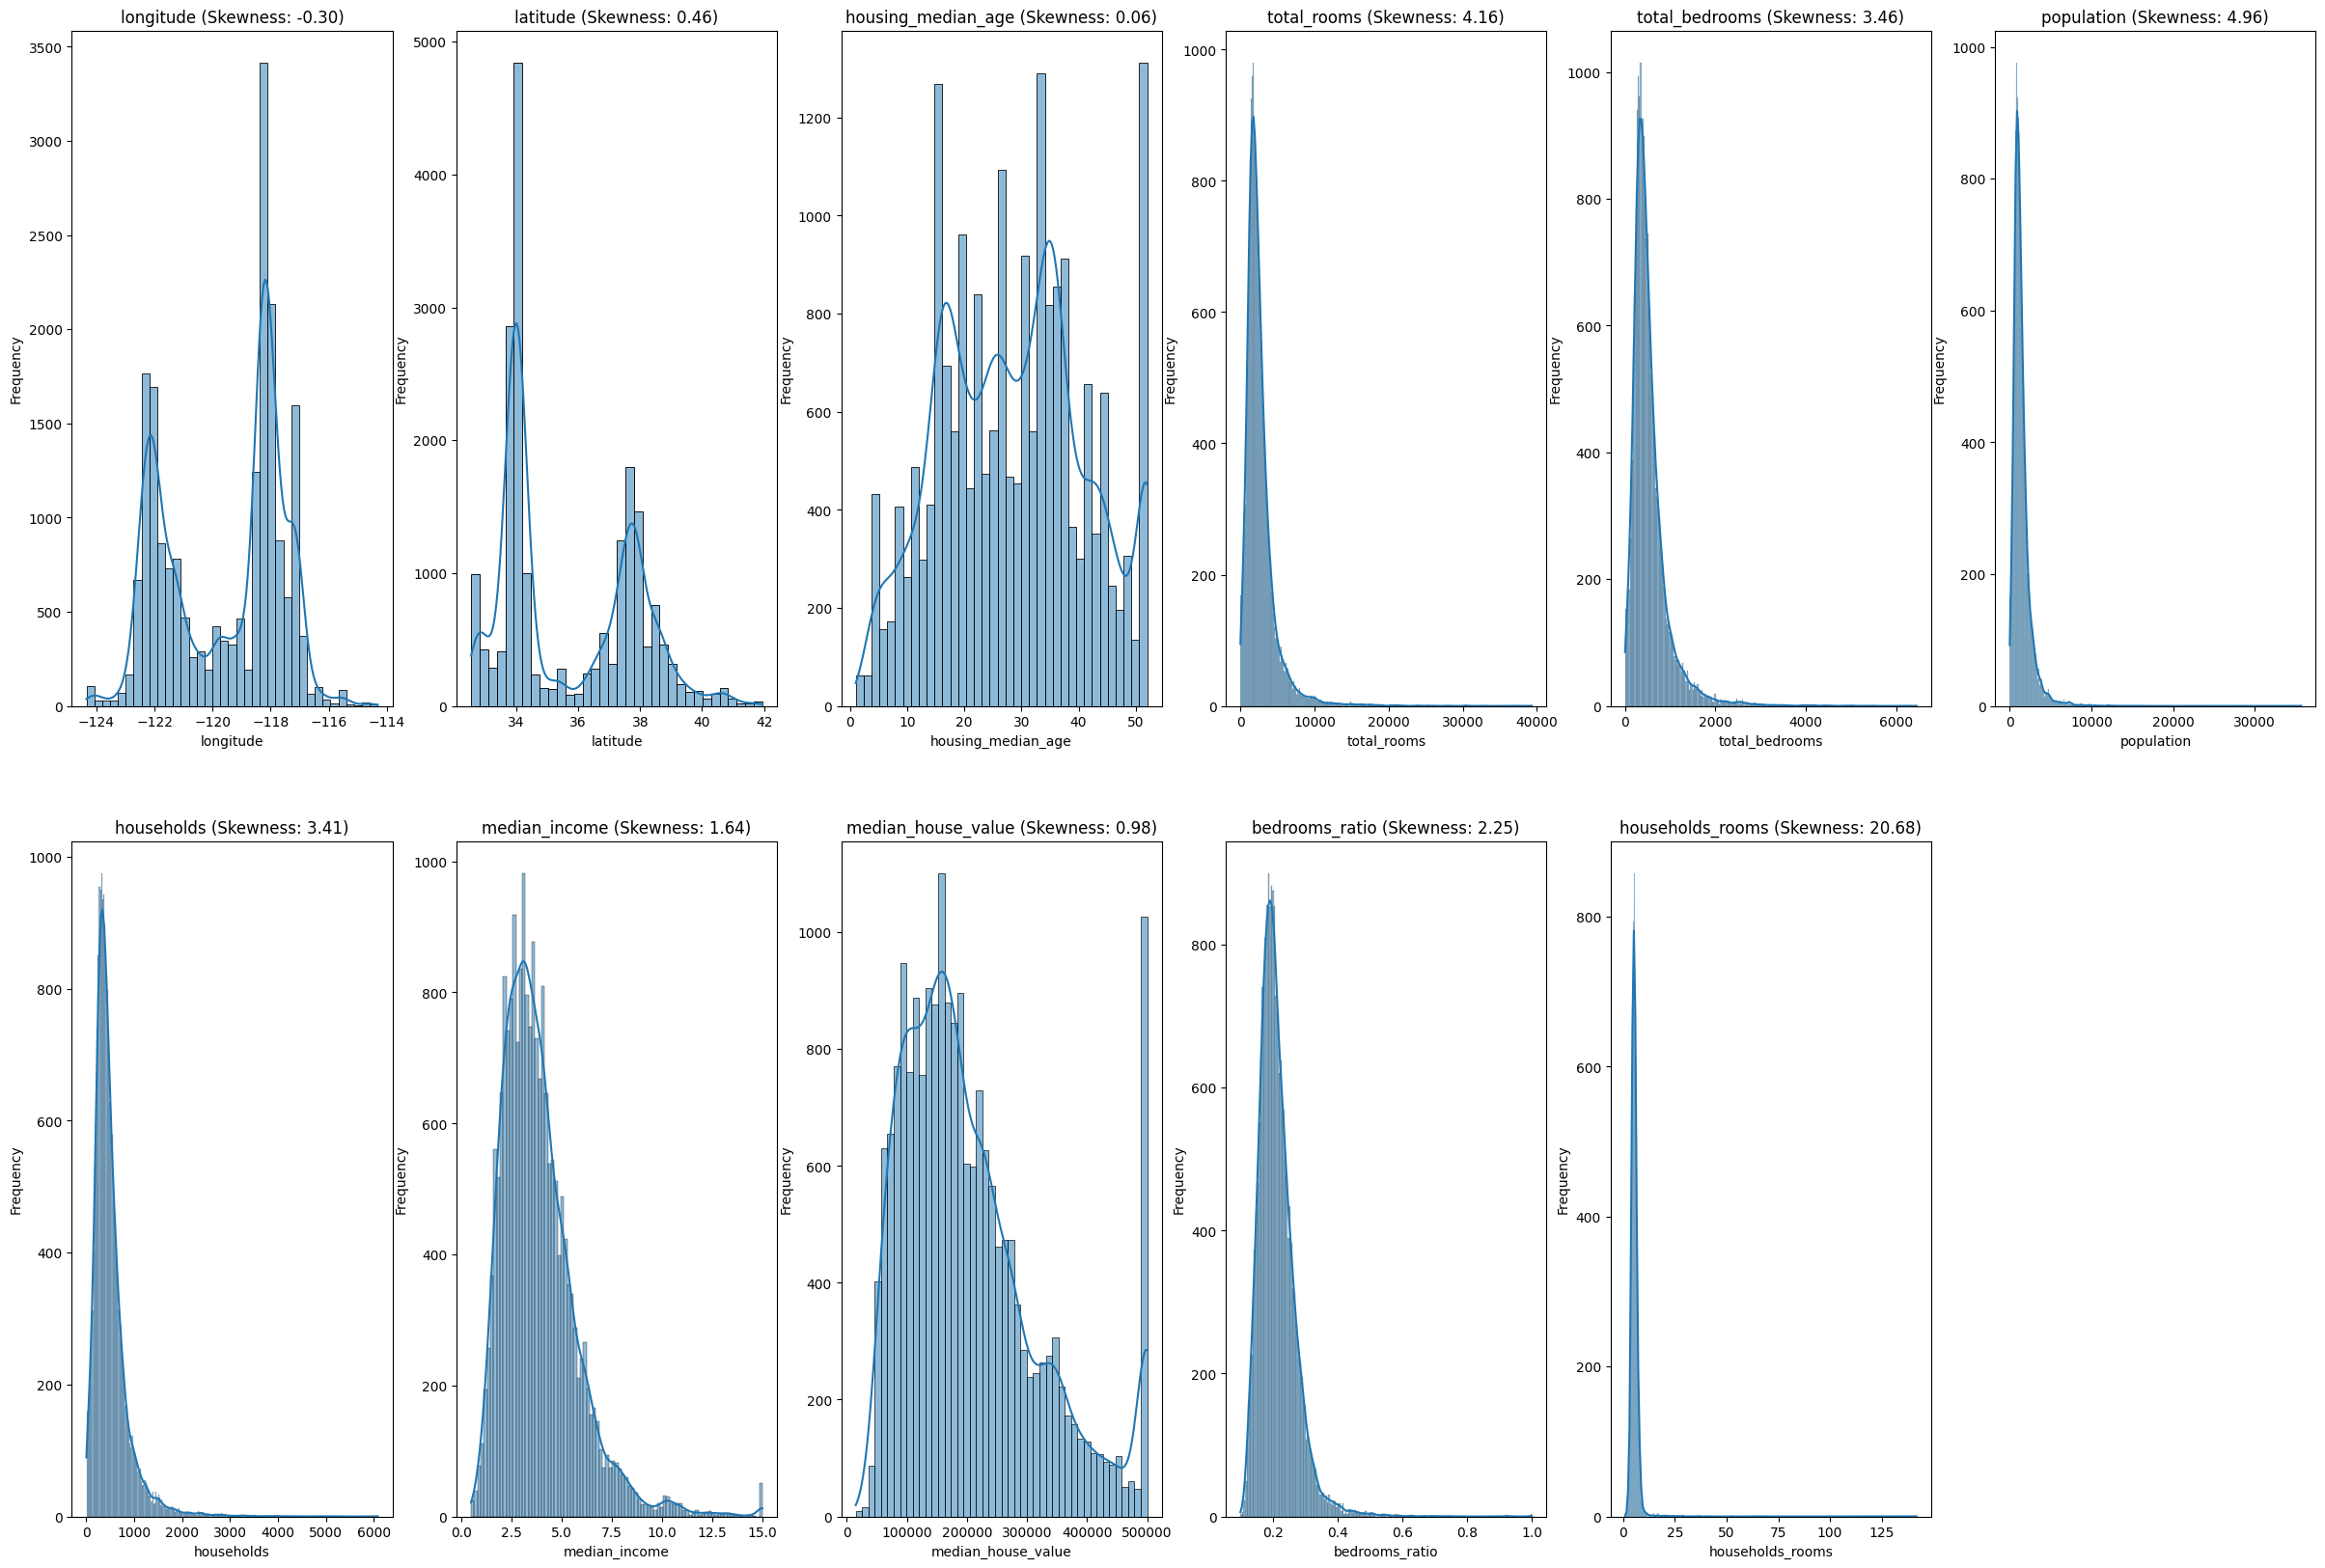

In [34]:
plt.figure(figsize=[30, 20])
for i in range(len(numeric.columns)):
    plt.subplot(2, 6, i + 1)  
    sns.histplot(house_data[numeric.columns[i]], kde=True)  
    skew = house_data[numeric.columns[i]].skew()
    plt.title(f"{numeric.columns[i]} (Skewness: {skew:.2f})") 
    plt.xlabel(numeric.columns[i])  
    plt.ylabel("Frequency")  

In [35]:
high_skew = []
for i in range(len(numeric.columns)):
    if abs(house_data[numeric.columns[i]].skew()) > 1:
        high_skew.append(numeric.columns[i])
high_skew   

['total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_ratio',
 'households_rooms']

In [36]:
house_data[high_skew] = np.log1p(house_data[high_skew])

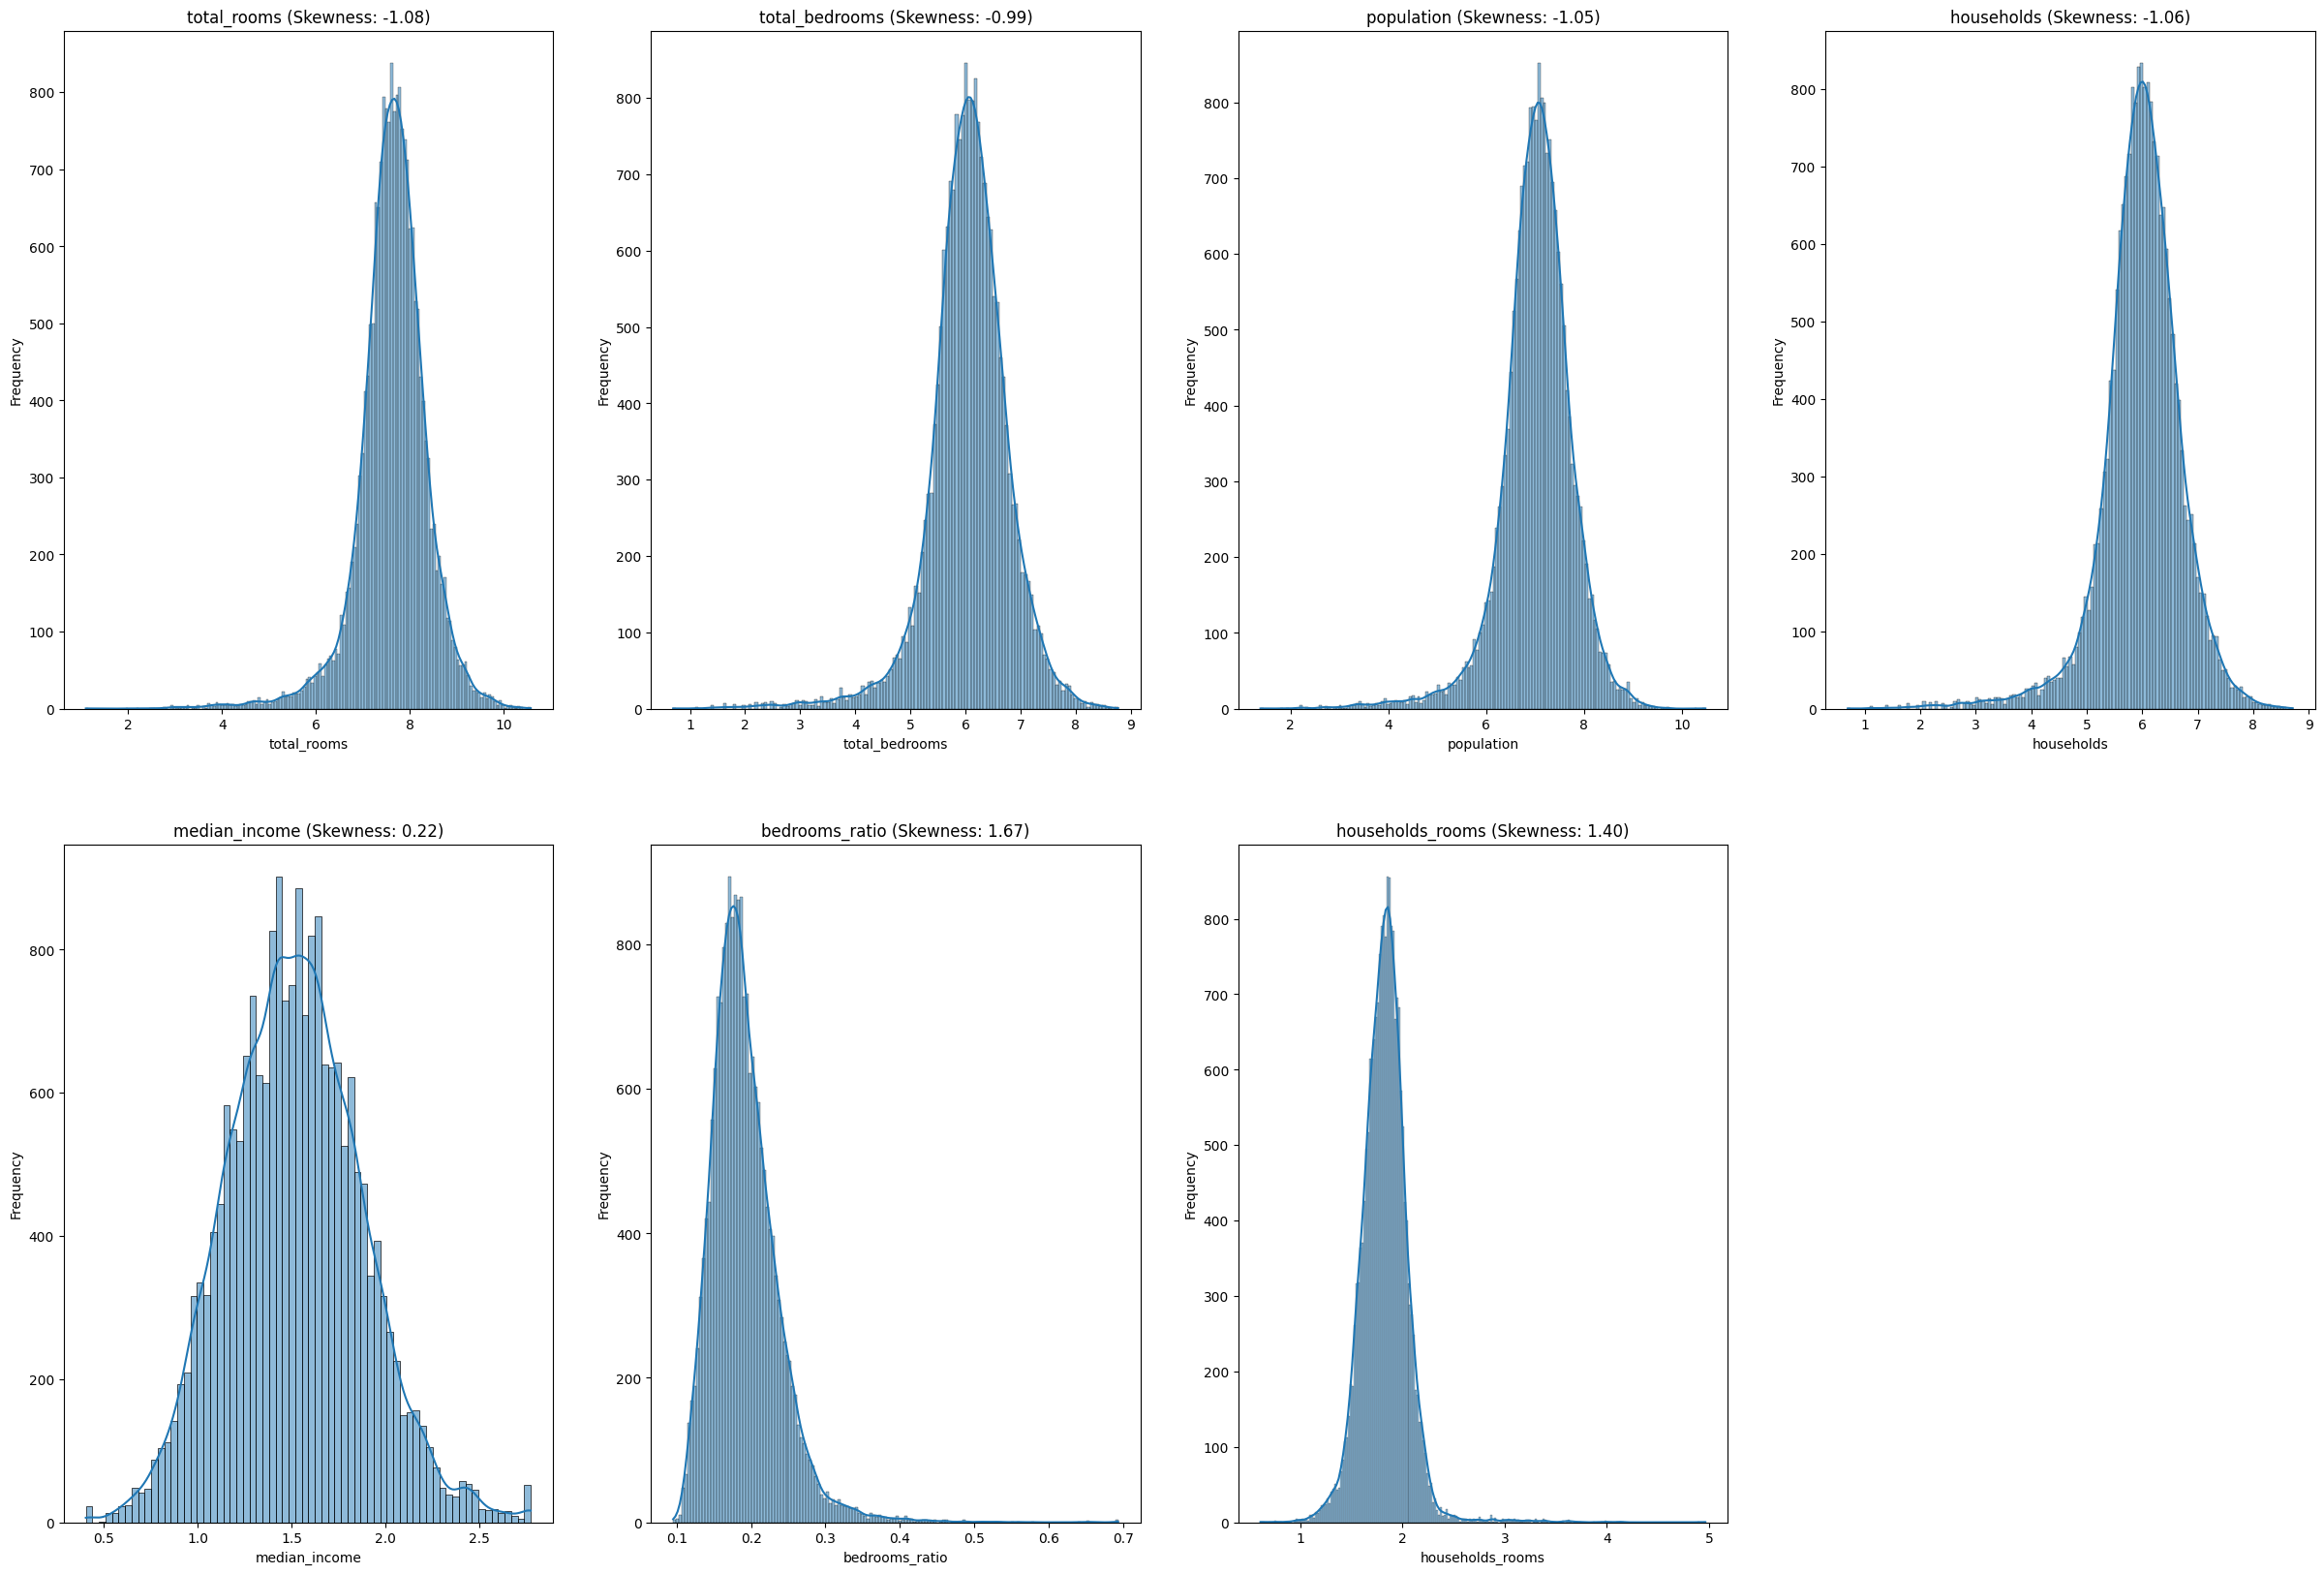

In [37]:
plt.figure(figsize=[30, 20])
for i in range(len(high_skew)):
    plt.subplot(2, 4, i + 1)  
    sns.histplot(house_data[high_skew[i]], kde=True)  
    skew = house_data[high_skew[i]].skew()
    plt.title(f"{high_skew[i]} (Skewness: {skew:.2f})") 
    plt.xlabel(high_skew[i])  
    plt.ylabel("Frequency")  

### Correlated Data

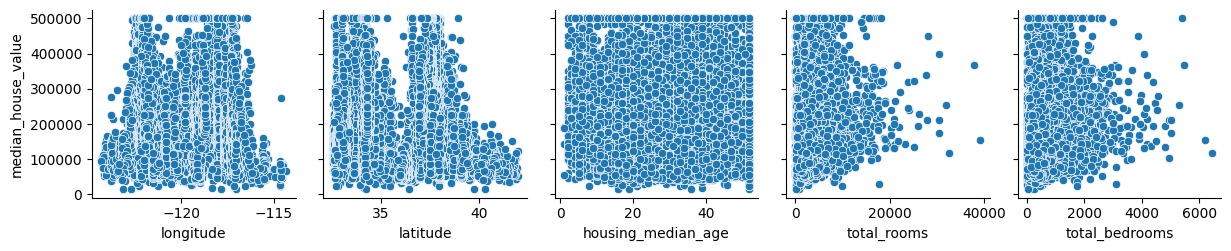

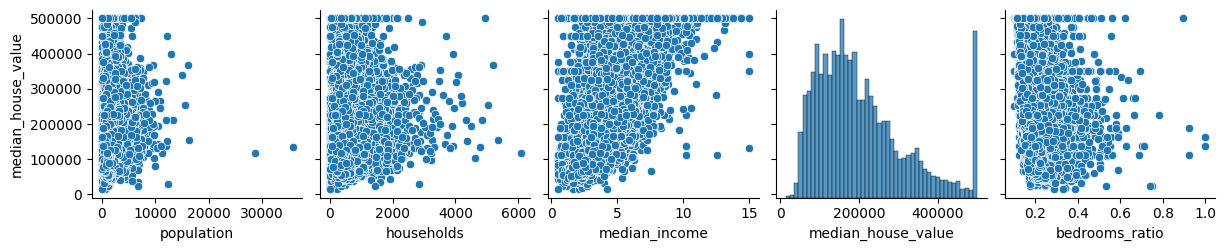

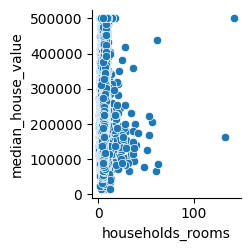

In [38]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["median_house_value"]);

In [39]:
num_corr = numeric.corr()["median_house_value"].sort_values(ascending = False)
num_corr

median_house_value    1.000000
median_income         0.688355
households_rooms      0.151344
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [40]:
house_data = house_data.drop(["households" , "total_bedrooms" , "housing_median_age" , "population"] , axis = 1)

In [41]:
house_data.head()

,longitude,latitude,total_rooms,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,6.781058,2.232720,452600.0,0.136793,2.077455,0,0,0,1,0
1,-122.22,37.86,8.867850,2.230165,358500.0,0.144790,1.979364,0,0,0,1,0
2,-122.24,37.85,7.291656,2.111110,352100.0,0.121789,2.228738,0,0,0,1,0
3,-122.25,37.85,7.150701,1.893579,341300.0,0.169286,1.919471,0,0,0,1,0
4,-122.25,37.85,7.395108,1.578195,342200.0,0.158793,1.985385,0,0,0,1,0


In [42]:
numeric = house_data.select_dtypes(include = ["float64"])

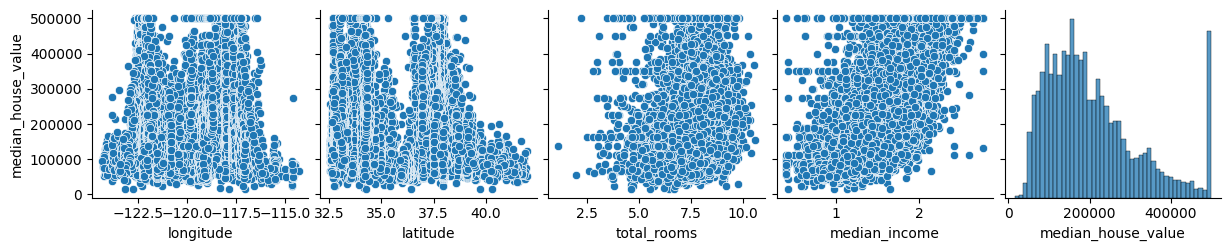

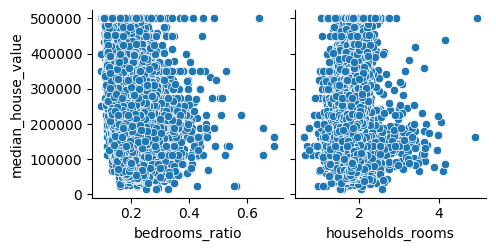

In [43]:
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["median_house_value"]);

## Feature Scaling

In [44]:
scaler = MinMaxScaler()
house_data[numeric.columns] = scaler.fit_transform(house_data[numeric.columns])
house_data.head()

,longitude,latitude,total_rooms,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.599357,0.771935,0.902266,0.069388,0.336702,0,0,0,1,0
1,0.212151,0.565356,0.819462,0.770856,0.708247,0.082764,0.314147,0,0,0,1,0
2,0.210159,0.564293,0.653213,0.720562,0.695051,0.044291,0.371486,0,0,0,1,0
3,0.209163,0.564293,0.638345,0.628668,0.672783,0.123738,0.300376,0,0,0,1,0
4,0.209163,0.564293,0.664124,0.495437,0.674638,0.106188,0.315532,0,0,0,1,0


## Data Spliting

In [45]:
y = house_data['median_house_value']  
X = house_data.drop('median_house_value', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preformance Metrics

In [46]:
from sklearn.metrics import r2_score

def performance(y_true , y_predict):
    score = r2_score(y_true , y_predict)
    
    return score

## Learning Curves

In [47]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 1634  3269  4903  6538  8173  9807 11442 13076 14711 16346]

[[0.35297908 0.29288084 0.33242584 0.33464851 0.29341433 0.31525707
  0.33022577 0.34487675 0.29505168 0.3098571 ]
 [0.3242157  0.30977817 0.33165867 0.32239448 0.29004258 0.31069692
  0.32721571 0.32444479 0.30389273 0.30080034]
 [0.31661771 0.32086181 0.3245773  0.32583174 0.29462617 0.31539943
  0.31942709 0.31655021 0.32014984 0.2971302 ]
 [0.31742103 0.3197792  0.31541963 0.33055141 0.30309    0.31272344
  0.30929682 0.31340968 0.31898393 0.30145168]
 [0.31571833 0.31713148 0.31395403 0.33391027 0.30616408 0.31179173
  0.30781554 0.31442542 0.32009208 0.3050328 ]
 [0.31660755 0.31352433 0.3094382  0.32616816 0.30934976 0.31541127
  0.31527879 0.31491912 0.31986771 0.30908194]
 [0.31834253 0.30982835 0.31187449 0.32794793 0.31221085 0.31629571
  0.31477077 0.31769303 0.31831856 0.31497585]
 [0.31674102 0.30911645 0.30512112 0.32282645 0.31199723 0.31588053
  0.31728128 0.31395782 0.31852255 0.31359523]
 [0

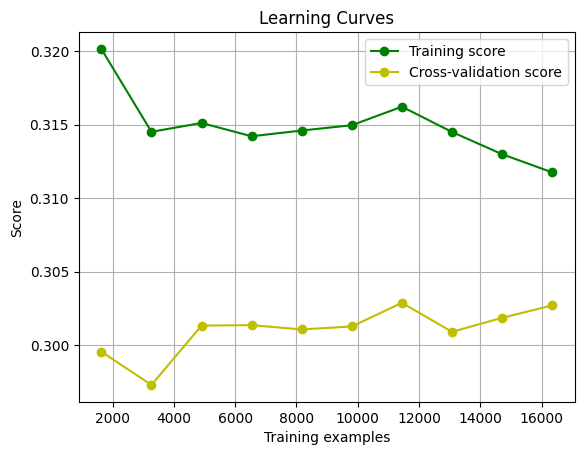

In [48]:
#estimator maxdepth=1
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3269  4903  6538  8173  9807 11442 13076 14711 16346]

[[0.58882663 0.55987055 0.59638778 0.58510835 0.55165391 0.58759072
  0.59415172 0.60119452 0.57381404 0.5708708 ]
 [0.57773283 0.56649478 0.58291254 0.57233468 0.5618631  0.57474159
  0.57983539 0.57652623 0.57132652 0.56555271]
 [0.57835875 0.57966533 0.5856928  0.58377328 0.56511887 0.57026787
  0.58327028 0.56908309 0.57595607 0.56442354]
 [0.58036676 0.57527969 0.57862064 0.58047673 0.56828647 0.57071377
  0.56757338 0.57571313 0.57102123 0.56546664]
 [0.57355425 0.56993484 0.57674591 0.5832223  0.568072   0.57037713
  0.56583889 0.57146684 0.57364824 0.56270071]
 [0.57241392 0.56784476 0.57083308 0.58412495 0.57104393 0.57163223
  0.57297118 0.57355746 0.56740578 0.56846946]
 [0.57380758 0.56571301 0.57316588 0.58102362 0.57228729 0.57480119
  0.57458853 0.57799141 0.56685878 0.57539675]
 [0.57283039 0.56800581 0.57045585 0.5781501  0.57065055 0.57215061
  0.57151314 0.57095807 0.57264174 0.57491718]
 [0

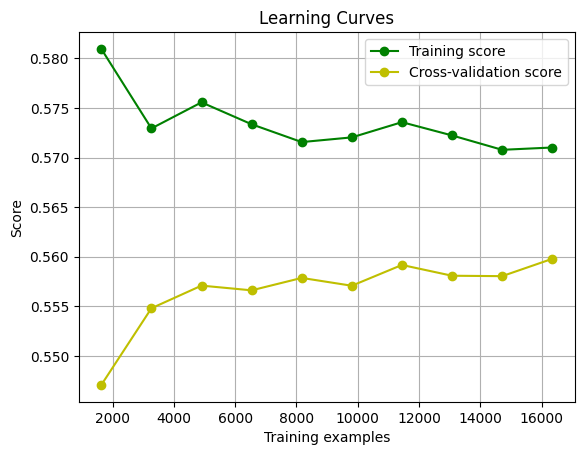

In [49]:
#estimator maxdepth=3
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3269  4903  6538  8173  9807 11442 13076 14711 16346]

[[0.72926838 0.68466922 0.72164775 0.73518016 0.71307664 0.73673031
  0.73985337 0.76098637 0.73320646 0.71497344]
 [0.7179645  0.6852913  0.70332226 0.7041771  0.69559234 0.71080096
  0.70790713 0.71033966 0.71209423 0.69095208]
 [0.7085275  0.6994411  0.69593391 0.70129187 0.68696762 0.69630299
  0.70639583 0.69810977 0.7102764  0.68544708]
 [0.70611884 0.69630265 0.69424922 0.69252385 0.68396673 0.68719558
  0.68904958 0.69689909 0.69769182 0.67622278]
 [0.69020985 0.69101312 0.68728499 0.6904125  0.68432076 0.68755886
  0.68906469 0.68910427 0.69447192 0.67804325]
 [0.68948939 0.68980445 0.680598   0.68897065 0.68283227 0.68896523
  0.68918294 0.69068298 0.68327748 0.68276163]
 [0.6885475  0.68575383 0.67850466 0.68913053 0.68020724 0.68057679
  0.69176489 0.6901676  0.68076466 0.68443269]
 [0.68666038 0.68347451 0.68079175 0.6835293  0.68035405 0.67733486
  0.68325588 0.68327222 0.68402679 0.68603369]
 [0

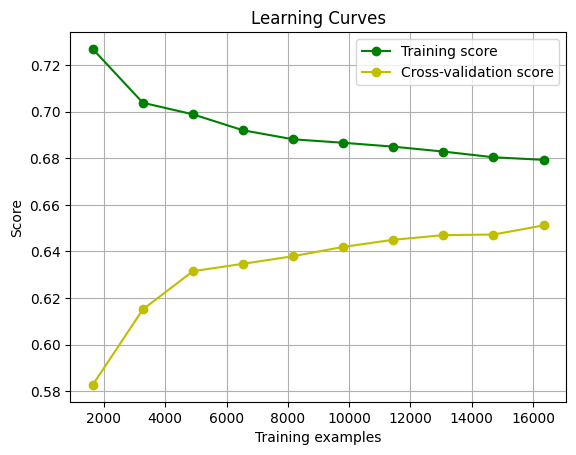

In [50]:
#estimator maxdepth=6
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3269  4903  6538  8173  9807 11442 13076 14711 16346]

[[0.87822445 0.83453596 0.85300465 0.87970861 0.8829028  0.89684923
  0.89077264 0.88920885 0.87683708 0.87094473]
 [0.87076829 0.83061337 0.85235488 0.85285858 0.84701732 0.86188848
  0.84226243 0.84710514 0.84914446 0.83115385]
 [0.84634137 0.82896456 0.83889776 0.8262673  0.84062495 0.83950918
  0.84461039 0.82798974 0.83836769 0.82446883]
 [0.83227584 0.82702147 0.82668823 0.83223942 0.82646788 0.82840568
  0.81526256 0.82433955 0.83061042 0.81244189]
 [0.82289751 0.8223407  0.81476353 0.81404734 0.82574932 0.82340862
  0.82353403 0.81112467 0.81326281 0.8107101 ]
 [0.81472921 0.82066379 0.81510539 0.81185075 0.81066558 0.82222463
  0.81456557 0.82017845 0.80868635 0.81255602]
 [0.80933511 0.81473748 0.80489509 0.81085344 0.80488925 0.80802607
  0.81303512 0.81399634 0.80849124 0.80932908]
 [0.8051469  0.80689018 0.80295684 0.80381529 0.80972227 0.79688327
  0.80474666 0.80401469 0.80421667 0.81003651]
 [0

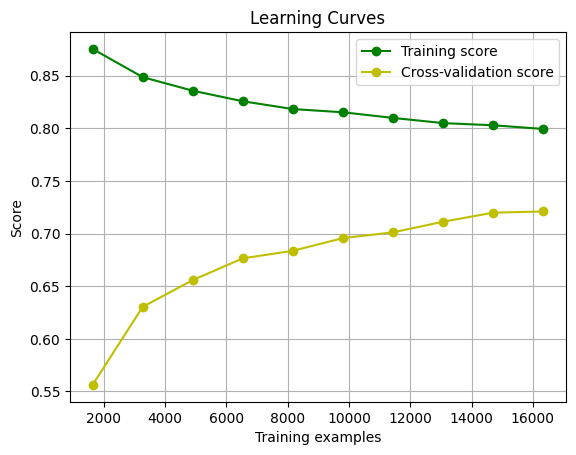

In [51]:
#estimator maxdepth=9
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=9,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3269  4903  6538  8173  9807 11442 13076 14711 16346]

[[0.95786986 0.94602108 0.94887338 0.9588328  0.96765711 0.97025734
  0.9703958  0.9645116  0.95541733 0.95835478]
 [0.95349418 0.92848906 0.93855385 0.94740306 0.954631   0.94800553
  0.93899983 0.9319293  0.93223752 0.92943978]
 [0.94193716 0.92395811 0.9221513  0.92524089 0.9323641  0.94108894
  0.93084377 0.91809954 0.93407268 0.92181543]
 [0.92302111 0.91859109 0.91474773 0.93026889 0.92147732 0.92491596
  0.91248504 0.91418362 0.92229896 0.91752173]
 [0.91187635 0.92391014 0.91161371 0.90818654 0.91996067 0.91800163
  0.92512435 0.90758378 0.90722193 0.90710172]
 [0.90486213 0.91033463 0.9109492  0.90337708 0.91391066 0.91819611
  0.9039451  0.91642529 0.90570777 0.90939699]
 [0.90097439 0.90681234 0.89516989 0.91199557 0.90780451 0.90723058
  0.89974197 0.90534406 0.90260092 0.90350811]
 [0.8944133  0.89438331 0.89617533 0.90453109 0.90674974 0.89559113
  0.89761092 0.89892893 0.89674818 0.90310126]
 [0

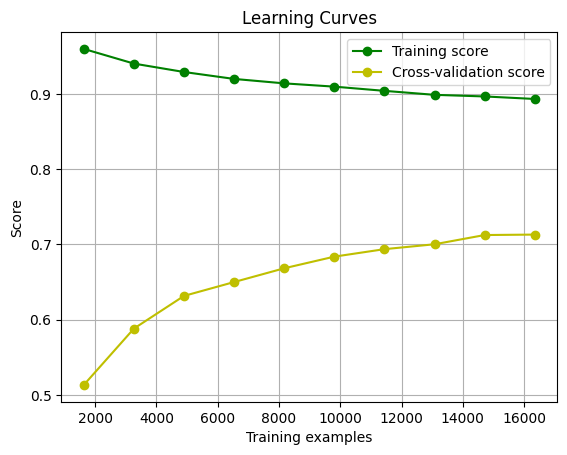

In [52]:
#estimator maxdepth=12
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=12,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [53]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')

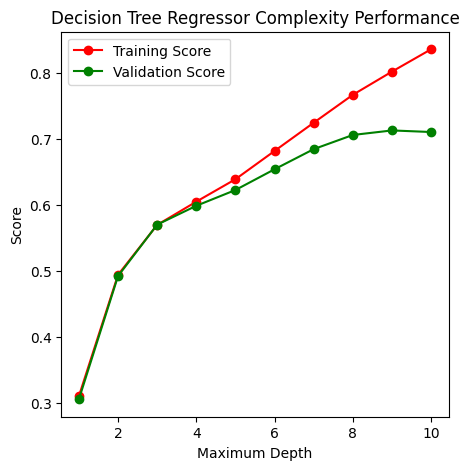

In [54]:
ModelComplexity(X_train, y_train)

## Decision Tree GridSearch

In [55]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    params = {"max_depth" : [20,21,22,24] , 'min_samples_leaf':[12,13,14,16,18],'min_samples_split':[2,6,8,10]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [56]:
reg = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))

Parameter 'max_depth' is 21 for the optimal model.
Parameter 'min_samples_leaf' is 14 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [57]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=14, random_state=0)

# Model Evaluation

In [58]:
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8437462180824121
The Test Score Is :  0.7623793534405383


# AdaBoost

In [59]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostRegressor

def fit_model(X , y):
    reg = AdaBoostRegressor(random_state=42)

    parameters = {'learning_rate':[0.1],'n_estimators':[35], 'base_estimator':[DecisionTreeRegressor(random_state=42)],'base_estimator__max_depth':[12],'base_estimator__min_samples_leaf':[20],'base_estimator__min_samples_split':[10]}
    cv_sets=ShuffleSplit(n_splits=5, random_state=42, test_size=0.2, train_size=None)

    scorer = make_scorer(performance)

    grid_obj = GridSearchCV(reg, parameters, scoring=scorer,cv=cv_sets)

    grid_fit = grid_obj.fit(X, y)

    return grid_fit.best_estimator_

In [60]:
reg = fit_model(X_train , y_train)

In [61]:
reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12,
                                                       min_samples_leaf=20,
                                                       min_samples_split=10,
                                                       random_state=42),
                  learning_rate=0.1, n_estimators=35, random_state=42)

In [62]:
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("Accuracy Score : ")
print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

Accuracy Score : 
The Train Score Is :  0.8723795799258985
The Test Score Is :  0.801955537250445
